In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
plot_columns = np.arange(-990,990,15)
str_plot_columns = [str(m) for m in plot_columns]

color_dict = {'+':'tab:blue', '-':'tab:orange'}

In [3]:
feature_type = '5e-4_qval'
data = pd.read_csv('../../MBC/ATAC_nucleosome_profiling/analysis/merged_data/'+feature_type+'_data_with_features.txt',sep='\t')
data = data[(data['tumor_fraction']>0.1) & (data['ulp_wgs_coverage']>0.1) &
            (data['revisions_ER_status_binary']!='none') & (data['first_passing_sample']==1)]
print(len(data['sample'].unique()))

101


In [4]:
data['site_name'].unique()

array(['ER_neg_heme.5e-4_qval', 'ER_pos_heme.5e-4_qval',
       'ER_pos_specific.5e-4_qval', 'ER_neg_specific.5e-4_qval'],
      dtype=object)

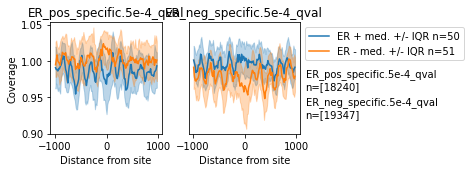

In [5]:
fig,axes = plt.subplots(1,2, figsize = (8,2.5), sharey='row')

for i,site_name in enumerate(['ER_pos_specific.5e-4_qval', 'ER_neg_specific.5e-4_qval']):
    for subtype in ['+','-']:
        ax = axes[i]
        current = data[(data['site_name']==site_name) & (data['revisions_ER_status_binary']==subtype)]
        ax.plot(plot_columns,current[str_plot_columns].median(), color = color_dict[subtype], label = 'ER '+subtype+' med. +/- IQR n='+str(len(current)))
        ax.fill_between(plot_columns,np.percentile(current[str_plot_columns],25, axis=0),np.percentile(current[str_plot_columns],75, axis=0), color = color_dict[subtype], alpha = 0.3)
        ax.set_title(site_name)
        ax.set_xlabel('Distance from site')
    axes[1].text(1.05,.4-.25*i,site_name+'\nn='+str(current['number_of_sites'].unique()), transform=axes[1].transAxes)
axes[0].set_ylabel('Coverage')
        
axes[1].legend(loc = 'upper left', bbox_to_anchor = [1,1])

axes[1].tick_params(left = False)


axes[0].set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
axes[1].set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

fig.tight_layout()

fig.subplots_adjust(wspace=-.5)

fig.savefig('plots/non_heme_cov_profiles.pdf')